In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [4]:
image_gen.flow_from_directory('D:\ANSON\OpenCV\CATS_DOGS\\train')

Found 18743 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
batch_size = 16

train_gen = image_gen.flow_from_directory('D:\ANSON\OpenCV\CATS_DOGS\\train',
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 18743 images belonging to 2 classes.


In [10]:
test_gen = image_gen.flow_from_directory('D:\ANSON\OpenCV\CATS_DOGS\\test',
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 6251 images belonging to 2 classes.


In [11]:
train_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [12]:
his = model.fit_generator(train_gen, steps_per_epoch=150, epochs=1, validation_data=test_gen, validation_steps=12)

D:\Users\Admin\miniconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


150/150 [==============================] - 117s 764ms/step - loss: 0.7307 - accuracy: 0.5304 - val_loss: 0.6791 - val_accuracy: 0.5625


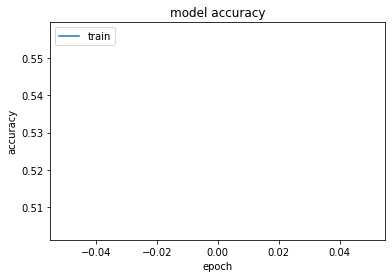

In [13]:
# summarize history for accuracy
plt.plot(his.history['accuracy'])
#plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
from keras.models import load_model
new_model = load_model('D:\ANSON\OpenCV\Computer-Vision-with-Python\\06-Deep-Learning-Computer-Vision\cat_dog_100epochs.h5')

In [18]:
new_model.metrics_names

['loss', 'accuracy']

In [29]:
from keras.preprocessing import image
dog_img = image.load_img('D:\ANSON\OpenCV\CATS_DOGS\\test\\DOG\\9381.jpg', target_size=(150,150))

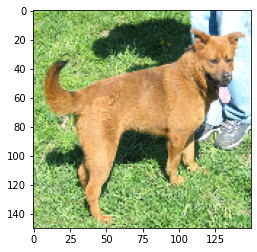

In [30]:
plt.imshow(dog_img)

In [32]:
dog_img = image.img_to_array(dog_img)
dog_img.shape

(150, 150, 3)

In [34]:
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)
dog_img.shape

(1, 150, 150, 3)

In [41]:
predict = new_model.predict(dog_img, 2)
int(predict)

1

In [39]:
test_gen.class_indices

{'CAT': 0, 'DOG': 1}